In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.shape

(53940, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [15]:
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


In [18]:
X= df.drop(["price"],axis =1)
y= df["price"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=15)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['cut', 'color', 'clarity']:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
15200,1.15,2,4,2,62.4,54.0,6.71,6.76,4.20
14632,1.11,3,1,2,61.3,58.0,6.66,6.61,4.07
19151,1.21,1,2,5,63.7,58.0,6.67,6.71,4.26
29299,0.30,2,5,5,61.5,58.0,4.28,4.31,2.64
9983,1.00,4,2,2,63.1,57.0,6.37,6.33,4.01


In [19]:
X_train.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000,40430.000000
mean,0.796206,2.552708,2.594089,3.840861,61.753396,57.448897,5.727667,5.729408,3.537283
std,0.474132,1.025958,1.702470,1.724057,1.411827,2.221713,1.119875,1.111668,0.691941
min,0.200000,0.000000,0.000000,0.000000,52.200000,43.000000,3.730000,3.710000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.530000,4.030000
max,5.010000,4.000000,6.000000,7.000000,72.200000,73.000000,10.740000,10.540000,6.980000


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40430 entries, 15200 to 7630
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40430 non-null  float64
 1   cut      40430 non-null  int64  
 2   color    40430 non-null  int64  
 3   clarity  40430 non-null  int64  
 4   depth    40430 non-null  float64
 5   table    40430 non-null  float64
 6   x        40430 non-null  float64
 7   y        40430 non-null  float64
 8   z        40430 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.1 MB


In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
tree_model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, random_state=15)
tree_model.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [24]:
y_pred = tree_model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean absolute error 451.3207022326995
R2 Score 0.9591938578767418


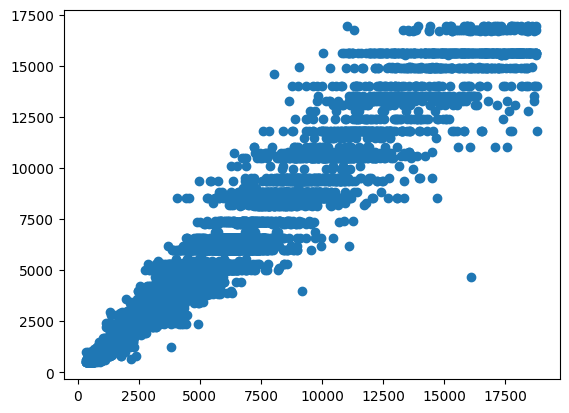

In [26]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

[Text(0.5204918032786885, 0.9375, 'x[0] <= 0.419\nsquared_error = 15839811.293\nsamples = 40430\nvalue = 3918.055'),
 Text(0.26229508196721313, 0.8125, 'x[0] <= -0.361\nsquared_error = 1242881.37\nsamples = 26192\nvalue = 1628.141'),
 Text(0.39139344262295084, 0.875, 'True  '),
 Text(0.13114754098360656, 0.6875, 'x[7] <= -0.661\nsquared_error = 264296.315\nsamples = 18681\nvalue = 1051.528'),
 Text(0.06557377049180328, 0.5625, 'x[6] <= -0.985\nsquared_error = 57314.247\nsamples = 13262\nvalue = 789.534'),
 Text(0.03278688524590164, 0.4375, 'x[6] <= -1.27\nsquared_error = 34706.019\nsamples = 8939\nvalue = 700.826'),
 Text(0.01639344262295082, 0.3125, 'x[6] <= -1.36\nsquared_error = 20083.653\nsamples = 2496\nvalue = 588.083'),
 Text(0.00819672131147541, 0.1875, 'x[3] <= 0.962\nsquared_error = 11115.61\nsamples = 1042\nvalue = 526.536'),
 Text(0.004098360655737705, 0.0625, 'squared_error = 8103.138\nsamples = 423\nvalue = 468.534'),
 Text(0.012295081967213115, 0.0625, 'squared_error = 9

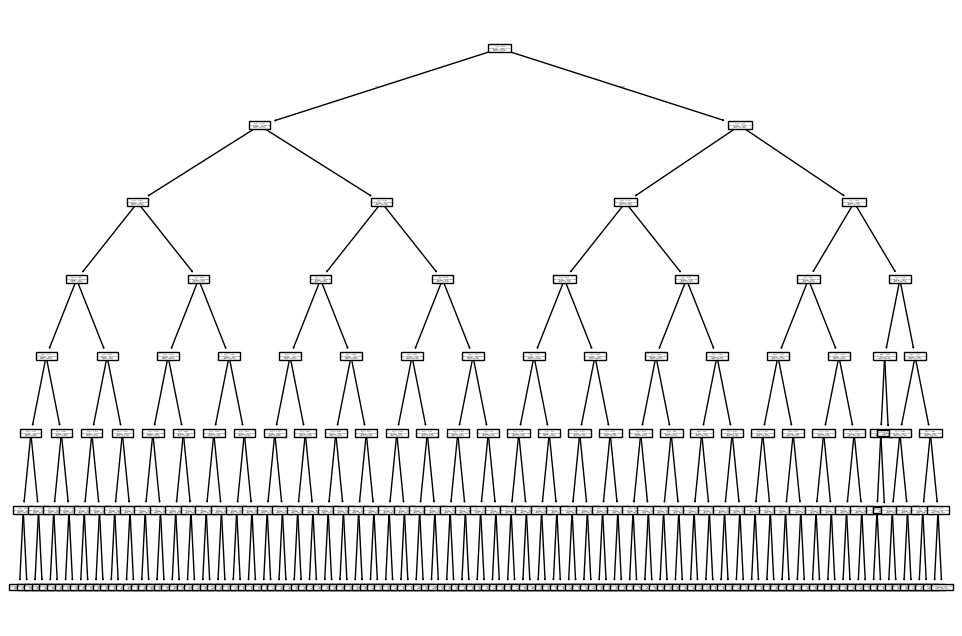

In [27]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(tree_model.fit(X_train_scaled, y_train))

In [28]:
param = {
    "criterion" : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None],
    "min_samples_leaf" : [1,2,3,4,5,10],
}

In [29]:
from sklearn.model_selection import GridSearchCV
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

In [30]:
total_combinations = np.prod([len(v) for v in param.values()])
n_fits = total_combinations * 5

In [31]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param, cv=5, n_jobs=-1, verbose=0)

In [32]:
with tqdm_joblib(tqdm(desc="Decision Tree Optimizasyonu", total=n_fits)) as progress_bar:
    grid.fit(X_train, y_train)

Decision Tree Optimizasyonu:   0%|          | 0/5040 [00:00<?, ?it/s]

  0%|          | 0/5040 [00:00<?, ?it/s]

In [33]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 10,
 'splitter': 'best'}

Mean absolute error 322.4274387692192
R2 Score 0.9748435904693865


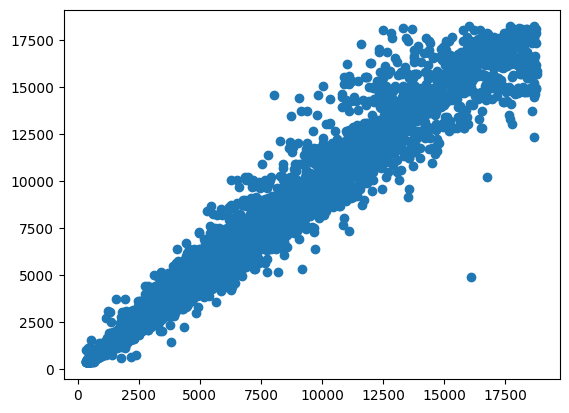

In [36]:
y_pred = grid.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()